In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from summarytools import dfSummary
from skimpy import skim
#import lux
df= pd.read_csv('hotel_booking.csv')
#pd.options.display.default_renderer = "lux"
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


Data Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.drop('name',axis=1,inplace=True)			
df.drop('email',axis=1,inplace=True)
df.drop('phone-number',axis=1,inplace=True)
df.drop('credit_card',axis=1,inplace=True)

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 119390 │ │ int64       │ 16    │                                                          │
│ │ Number of columns │ 32     │ │ string      │ 12    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA     ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ is_canceled           │      0 │     0 │   0.3704 │  0.4829 │     0 │     0 │     0 │    1 │    1 │ ▇    ▅ │  │
│ │ lead_time             │      0 │     0 │      104 │   106.9 │     0 │    18 │    69 │  160 │  737 │  ▇▃▁   │  │
│ │ arrival_date_year     │      0 │     0 │     2016 │  0.7075 │  2015 │  2016 │  2016 │ 2017 │ 2017 │ ▃  ▇ ▆ │  │
│ │ arrival_date_week_num │      0 │     0 │    27.17 │   13.61 │     1 │    16 │    28 │   38 │   53 │ ▅▇▆▇▇▅ │  │
│ │ ber                   │        │       │          │         │       │       │       │      │      │        │  │
│ │ arrival_date_day_of_m │      0 │     0 │     15.8 │   8.781 │     1 │     8 │    16 │   23 │   31 │ ▇▇▇▇▇▇ │  │
│ │ onth                  │        │       │          │         │       │       │       │      │      │        │  │
│ │ stays_in_weekend_nigh │      0 │     0 │   0.9276 │  0.9986 │     0 │     0 │     1 │    2 │   19 │   ▇    │  │
│ │ ts                    │        │       │          │         │       │       │       │      │      │        │  │
│ │ stays_in_week_nights  │      0 │     0 │      2.5 │   1.908 │     0 │     1 │     2 │    3 │   50 │   ▇    │  │
│ │ adults                │      0 │     0 │    1.856 │  0.5793 │     0 │     2 │     2 │    2 │   55 │   ▇    │  │
│ │ children              │      4 │     0 │   0.1039 │  0.3986 │     0 │     0 │     0 │    0 │   10 │   ▇    │  │
│ │ babies                │      0 │     0 │ 0.007949 │ 0.09744 │     0 │     0 │     0 │    0 │   10 │   ▇    │  │
│ │ is_repeated_guest     │      0 │     0 │  0.03191 │  0.1758 │     0 │     0 │     0 │    0 │    1 │   ▇    │  │
│ │ previous_cancellation │      0 │     0 │  0.08712 │  0.8443 │     0 │     0 │     0 │    0 │   26 │   ▇    │  │
│ │ s                     │        │       │          │         │       │       │       │      │      │        │  │
│ │ previous_bookings_not │      0 │     0 │   0.1371 │   1.497 │     0 │     0 │     0 │    0 │   72 │   ▇    │  │
│ │ _canceled             │        │       │          │         │       │       │       │      │      │        │  │
│ │ booking_changes       │      0 │     0 │   0.2211 │  0.6523 │     0 │     0 │     0 │    0 │   21 │   ▇    │  │
│ │ agent                 │  16340 │ 13.69 │    86.69 │   110.8 │     1 │     9 │    14 │  229 │  535 │  ▇▁▃   │  │
│ │ company               │ 112593 │ 94.31 │    189.3 │   131.7 │     6 │    62 │   179 │  270 │  543 │ ▇▃▆▃▂▁ │  │
│ │ days_in_waiting_list  │      0 │     0 │    2.321 │ 

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

A simple Univariate Analysis

In [6]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,hotel[object],1. City Hotel2. Resort Hotel,"79,330 (66.4%)40,060 (33.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC8ii80itBshNEVs3EyKFCE4pXhjnu9ZwTe+CGz0UmstAIUUEeeIOPU+BP+6t9auvY84yjBN00fOeex9CB7VWreU0qdLcEPOebxcLtdSyq33Mfi17/v7sizjuq6niPCILSKilHKb5/mr9zF4cO59wJHeeh+A10FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoPMEPHzol7vQ/CX43cy1Fq3ZVnGMHtRz0GtdYuIe+87jsLg5blZDV4SUz6oOD7ZrJ4GTuymfG7zNydWUz7H+ZsTxykfv6qfFH/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZqymfy+dwZTflc5u/OWHwAplvCltq31B2yb4AAAAASUVORK5CYII="">",0(0.0%)
2,is_canceled[int64],1. 02. 1,"75,166 (63.0%)44,224 (37.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOElEQVR4nO3bwYnDMBRF0a/BhMlGwhhcjIuYYqcIdWOMtUhCNsoiNfjJ1r+ngp9wMST4hVqrAQrBzO5mdmt9COxda322PuJIwzRNfzHGsfUh3pVSthDCf8/BDTHGcVmWZ0rp1foYr/Z9/805j+u63sys39jMzFJKr3meH62Pce7e+oCj/bQ+AH4QG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggM5h9X95rfYhnXr7/oZSy5ZxHc/Dy3pmVUjYze7e+40gMXs6j+8FLYMoHFS9Ptu6fGlfgYsrnYSZ3Bd1P+bzM5K7Ay5SPX9onwJ+6kCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGm+ylfz5/talxM+TzM5K6AwQtkPgpbat+zkoHLAAAAAElFTkSuQmCC"">",0(0.0%)
3,lead_time[int64],Mean (sd) : 104.0 (106.9)min < med < max:0.0 < 69.0 < 737.0IQR (CV) : 142.0 (1.0),479 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRklEQVR4nO3dMW/aQBiH8fdKggxENogKNq9sGRhZ+g36Ybt2Z+drIEFshBMCstylVJXaBjhD8f/0/ObcheFRyL066VxVVQY03ad7fwDgHA+nfsA51zGztuf++6qq3jzXAr98GKpzrjMcDr/GcTzw2Xyz2bw4574RK+o69Re1HcfxYDabvSVJsrtk4zzPo/l8PlitVm0zI1TUcvKr38wsSZLdaDR69di/47EG+AOHKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEg461UUX2VZPppZ7Jzz3YIH1WBmNwy1KIrHw+HwnKZpq9VqXfRG1REPquHoZqHu9/uHKIq60+l0Nx6PXy5dz4Nq+N1Nv/rNzHq9nu9jamY8qIafOExBAqFCAqFCAqFCws0PU3XUnMMygw1IY0OtO4dlBhuWxoZaZw7LDDY8jQ31qMYclhlsQDhMQQKhQgKhQgKhQgKhQkLjT/2+uLQdliBD5dJ2eIIMlUvb4Qky1KM6l7bLsoyNewaNEXSovrhn0DyE+hfcM2geQv0A9wyag1BvgHu010eoV1b3/9ssy7bOue9m5jVWs0BDPyvUPM+jSzfebreRmVlRFNFyuez+z/X3/N3r9fopiqLuZDJx/X7//ZK1WZY9LRaLL2mafvad/14h9Ht5r6rqn5/5B57+GUqfM5ZGAAAAAElFTkSuQmCC"">",0(0.0%)
4,arrival_date_year[int64],1. 20162. 20173. 2015,"56,707 (47.5%)40,687 (34.1%)21,996 (18.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrbYBSF0aciQjORMAYvxovoYrsI7cYYa9CETNRB5yWk5f7yr3NW8Gw+bGR8h23bChK+tT6A4xiq6rWqXlof8gQ+tm17a33EMxvP5/OPaZpOrQ/Zu3Vd78Mw/BTc143TNJ2u1+vbPM/vrY/Zq8fj8X1ZltPtdnupKrF90VhVNc/z++Vy+dX6mJ17bX3As/OAQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2YserP/7VaH7Jn3p//Y1zX9b4sy6n8X+uv1nW9V9VH6zuemQ3C59kg/KPBlI+UXj/ZfArtUJfrKkuofepuXWUJtV+9rqs8We+QH3WJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEdPduqqn19KbLtdVllD7ZINAjHUVMR4QiGn1Nepr7oCaTPlM7Y4pPuUztTuuVlO+bn5m4fM8IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjJj7lM7U7riZTPlO7Y7JBIMaUj5jfvvGjSsMgS4QAAAAASUVORK5CYII="">",0(0.0%)
5,arrival_date_month[object],1. August2. July3. May4. October5. April6. June7. September8. March9. February10. November11. other,"13,877 (11.6%)12,661 (10.6%)11,791 (9.9%)11,160 (9.3%)11,089 (9.3%)10,939 (9.2%)10,508 (8.8%)9,794 (8.2%)8,068 (6.8%)6,794 (5.7%)12,709 (10.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTg

The dfsummary library is an eda tool that can give us a summary of our data . It can be used to get a quick overview of the data and to identify any potential issues with any column  , it gives the frequency , the nan % and the stat of the values .

1. Dropping raws  with nan values
2. Dropping columns with the most nan values  

In [7]:
df['arrival_date_day_of_month']
df.drop('company',axis=1,inplace=True)
df.drop('agent',axis=1,inplace=True)
df.dropna(subset=['children'],axis=0,inplace=True)
df.dropna(subset=['country'],axis=0,inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].rename(
    columns={'arrival_date_year': 'year', 'arrival_date_month': 'month', 'arrival_date_day_of_month': 'day'}
))
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


To make the data more clear we prefer doing some simple Feature engineering by creating new column 'season'

In [9]:
# df.drop('arrival_date_year',axis=1,inplace=True)
# df.drop('arrival_date_month',axis=1,inplace=True)
# df.drop('arrival_date_day_of_month',axis=1,inplace=True)
df['season']=df['arrival_date_month'].map({1:'winter',3:'spring',6:'summer',9:'autumn',
                                           2:'winter',4:'spring',7:'summer',10:'autumn',
                                           12:'winter',5:'spring',8:'summer',11:'autumn',
})
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,season
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,summer
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,summer
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,summer
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,summer


In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns_needed=numeric_columns[5:]
numeric_columns_needed

['stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

Detecting outliers through boxplot

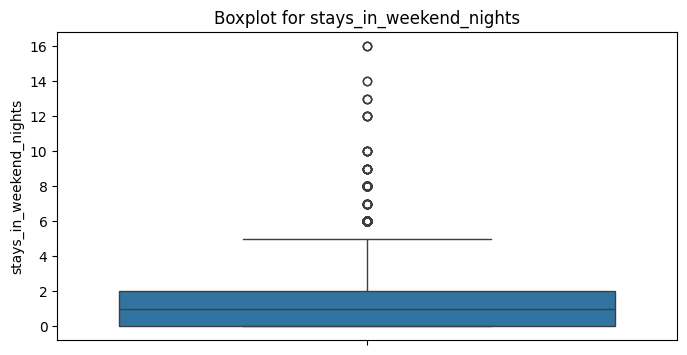

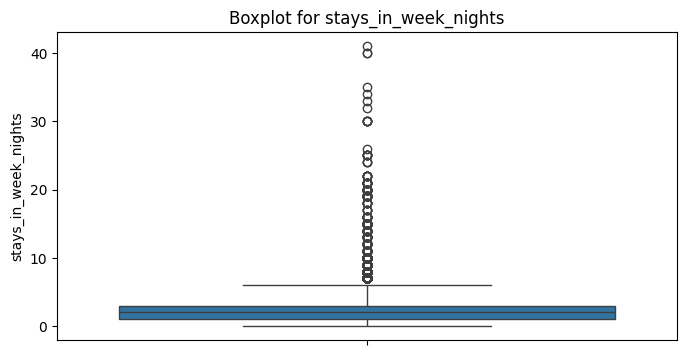

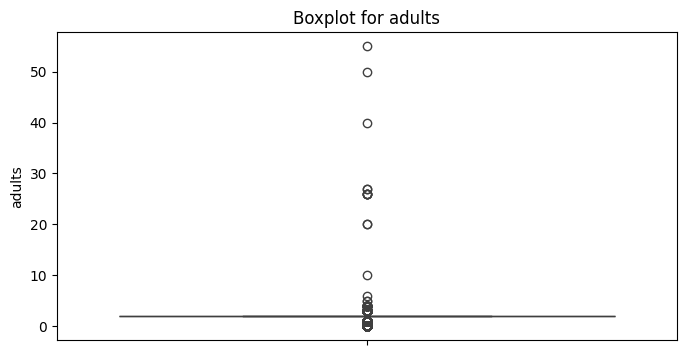

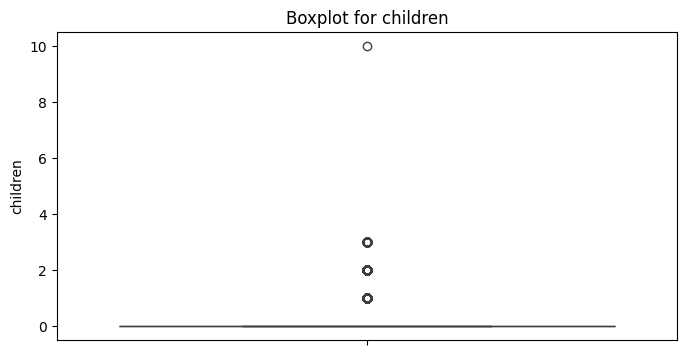

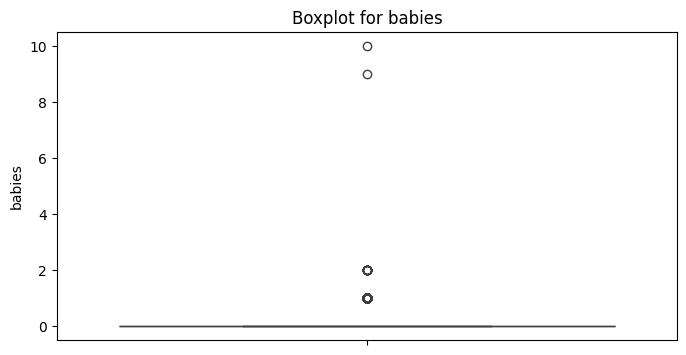

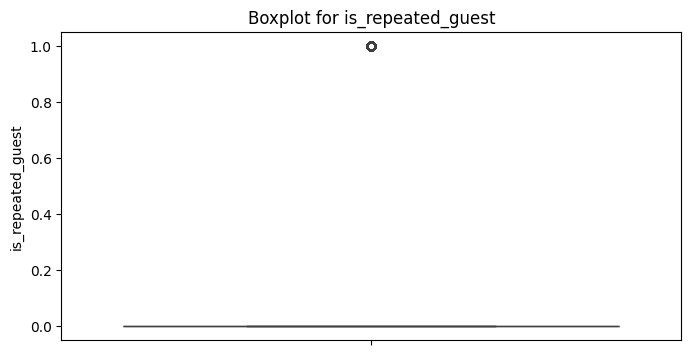

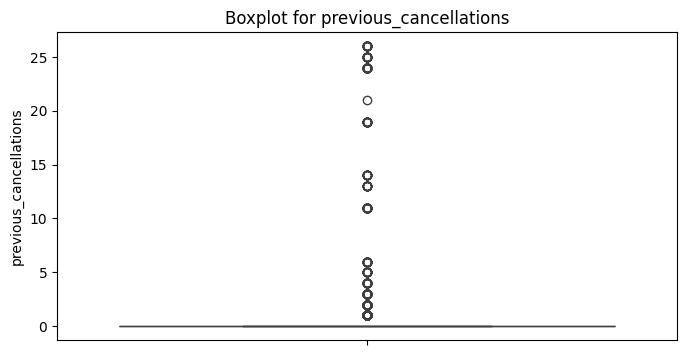

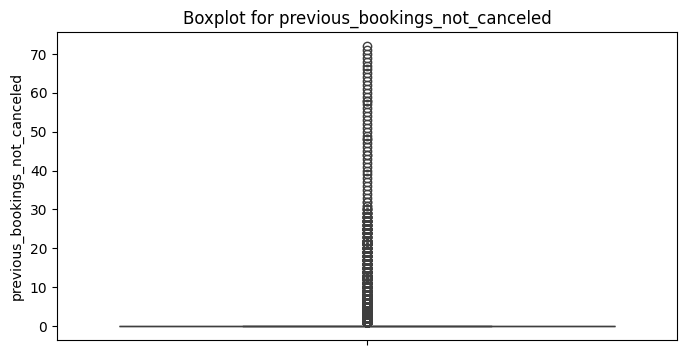

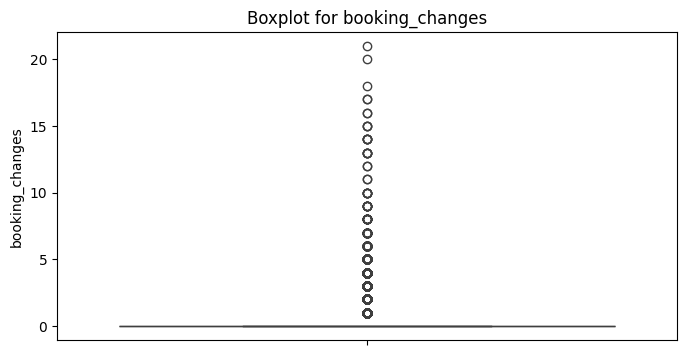

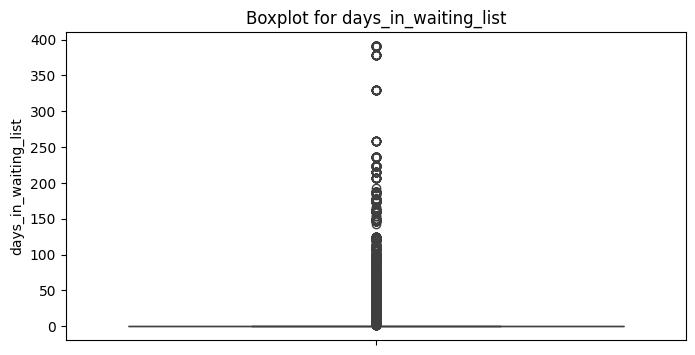

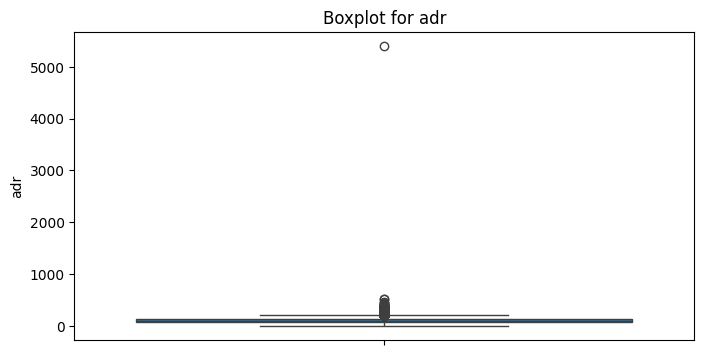

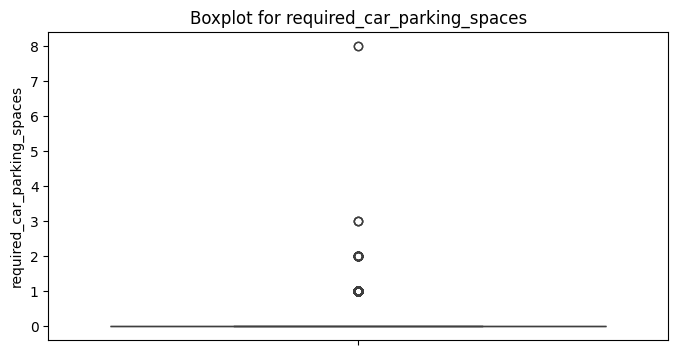

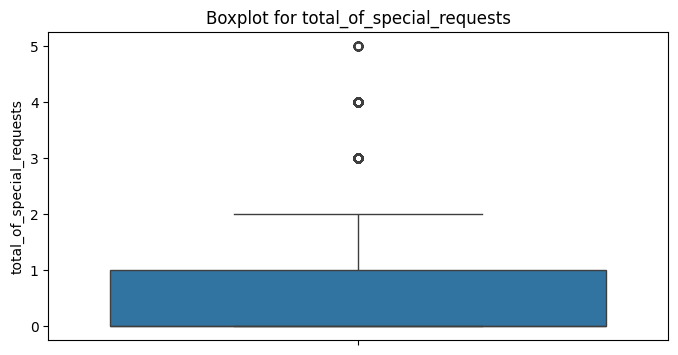

In [11]:
for col in numeric_columns_needed:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot for {col}")
    plt.show()
    plt.close()

In [12]:
df=df[df['adr']<=5000]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,season
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,summer
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,summer
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,summer
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,summer


The Analysis

What are the most common reasons for booking cancellations?

Booking cancellations can significantly impact a hotel's revenue and operational planning. By analyzing the reasons behind cancellations, we can identify actionable insights. Factors such as lead time, deposit type, customer type, and previous cancellations play a critical role in influencing the likelihood of cancellations. For example, non-refundable bookings might discourage cancellations, while longer lead times might lead to a higher chance of cancellation.

Text(0, 0.5, 'Number of Reservations')

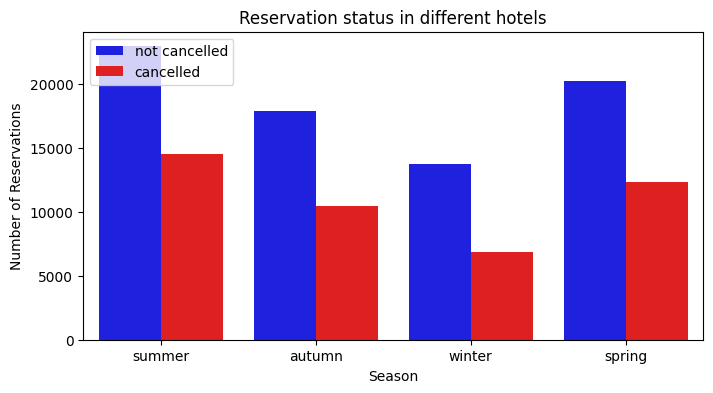

In [13]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'season', hue = 'is_canceled', data = df, palette = ['blue', 'red'])

plt.legend(loc = 'upper left', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status in different hotels')
plt.xlabel('Season')
plt.ylabel('Number of Reservations')

Text(0, 0.5, 'Number of Reservations')

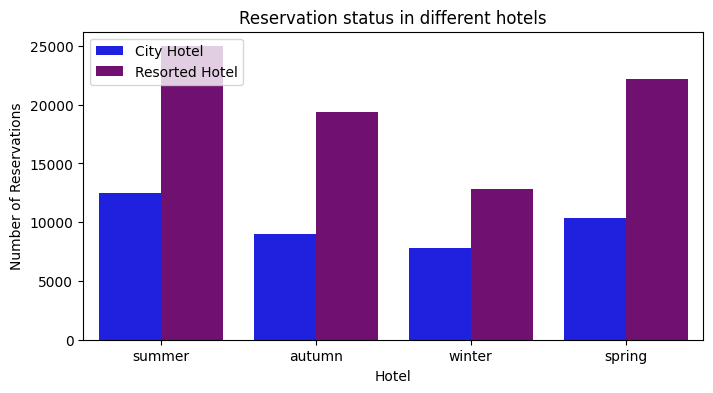

In [14]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'season', hue = 'hotel', data = df, palette = ['blue', 'purple'])

plt.legend(loc = 'upper left', labels=['City Hotel','Resorted Hotel'])
plt.title('Reservation status in different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

(0.0, 10.0)

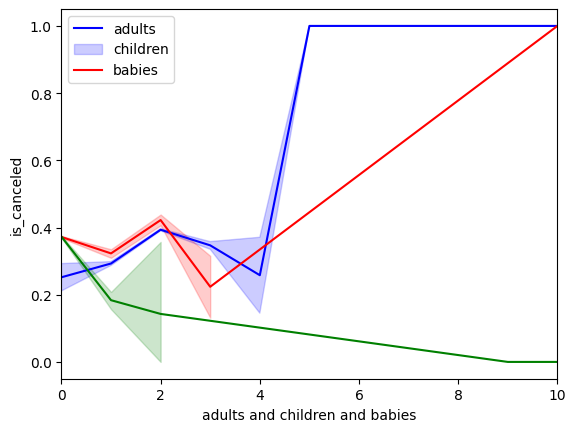

In [15]:
sns.lineplot(data=df,x='adults',y='is_canceled',color='blue')
sns.lineplot(data=df,x='children',y='is_canceled',color='red')
sns.lineplot(data=df,x='babies',y='is_canceled',color='green')
plt.xlabel('adults and children and babies')
plt.legend(labels=['adults','children','babies'])
plt.xlim(0,10)

Text(0, 0.5, 'Number of Reservations')

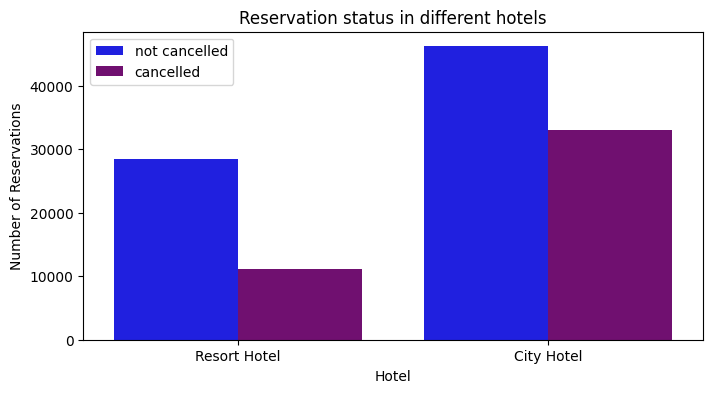

In [16]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = ['blue', 'purple'])

plt.legend(loc = 'upper left', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status in different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

In [17]:
type_and_date = df[['hotel', 'customer_type','season','is_canceled']].copy()
count_canceled = type_and_date.groupby(['customer_type', 'hotel','season']).count().rename(columns={'is_canceled': 'count'})
count_canceled.reset_index(inplace=True)
count_canceled.sort_values(by='count', ascending=True, inplace=True)
count_canceled

,customer_type,hotel,season,count
7,Contract,Resort Hotel,winter,40
10,Group,City Hotel,summer,47
9,Group,City Hotel,spring,48
11,Group,City Hotel,winter,55
12,Group,Resort Hotel,autumn,58
13,Group,Resort Hotel,spring,69
14,Group,Resort Hotel,summer,72
15,Group,Resort Hotel,winter,79
1,Contract,City Hotel,spring,90
8,Group,City Hotel,autumn,142


<Axes: xlabel='market_segment', ylabel='count'>

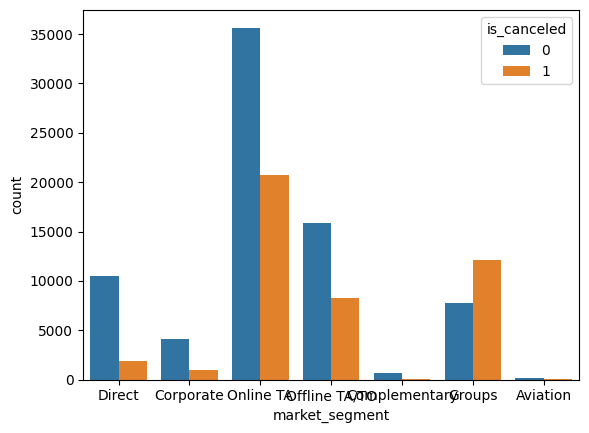

In [18]:
sns.countplot(data=df,x='market_segment',hue='is_canceled')

<Axes: xlabel='total_of_special_requests', ylabel='count'>

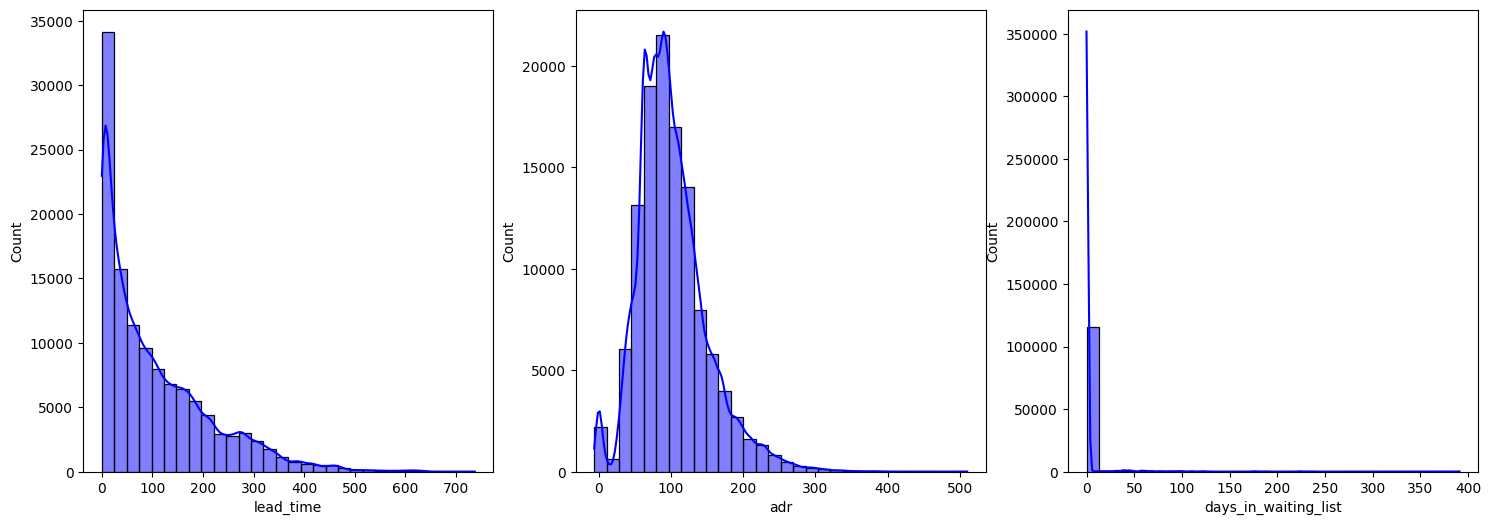

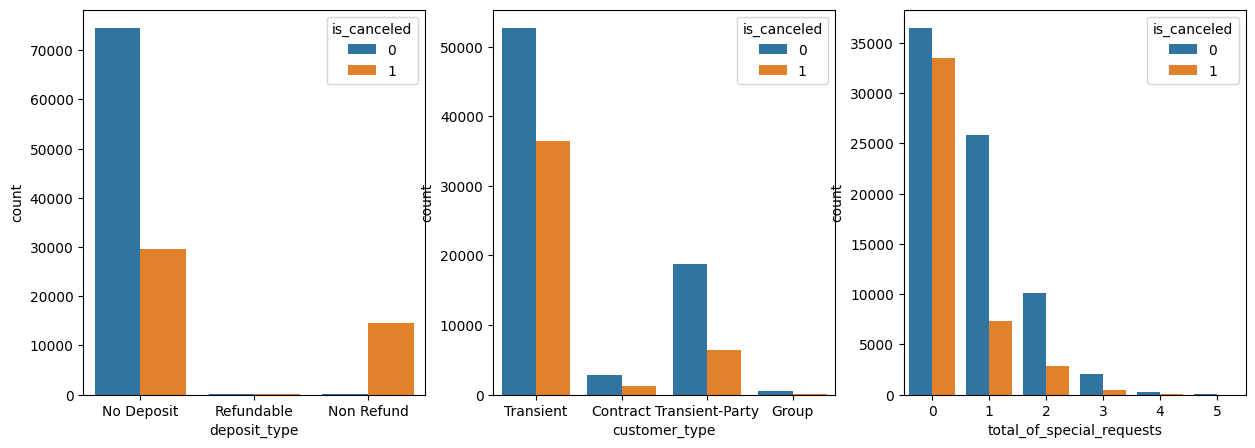

In [19]:
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))  
sns.histplot(df['lead_time'], bins=30, kde=True, color='blue', ax=axes1[0]) 
sns.histplot(df['adr'], bins=30, kde=True, color='blue', ax=axes1[1])
sns.histplot(df['days_in_waiting_list'], bins=30, kde=True, color='blue', ax=axes1[2])
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df,x='deposit_type',hue='is_canceled', ax=axes2[0])
sns.countplot(data=df,x='customer_type',hue='is_canceled', ax=axes2[1])
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled', ax=axes2[2])

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,season
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,summer
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,summer
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,summer
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,summer


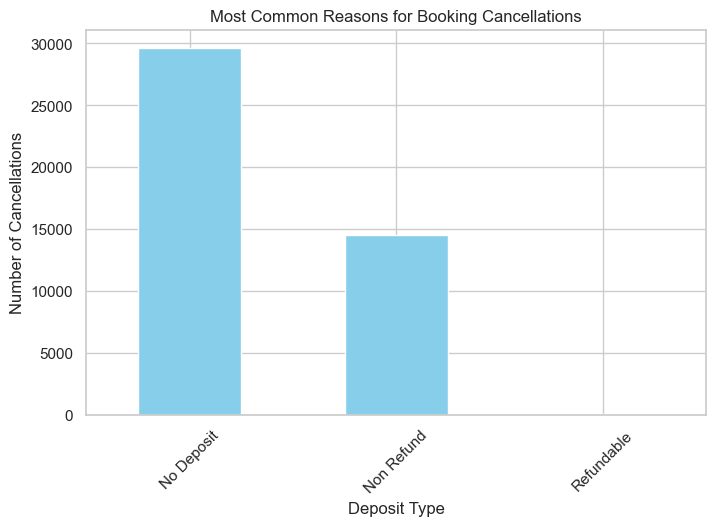

In [21]:
sns.set(style="whitegrid")
cancellation_reasons = df[df['is_canceled'] == 1].groupby('deposit_type')['is_canceled'].count()
cancellation_reasons.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Most Common Reasons for Booking Cancellations')
plt.ylabel('Number of Cancellations')
plt.xlabel('Deposit Type')
plt.xticks(rotation=45)
plt.show()

How do seasonal trends affect booking behavior or average daily rates?

Seasonality plays a major role in the hospitality industry, influencing both booking behavior and pricing strategies. High seasons, such as summer or holidays, often see increased demand, leading to higher ADRs. Conversely, off-peak seasons might feature lower prices to attract guests. This section explores how seasonality affects customer behavior, booking patterns, and revenue generation, helping hotels optimize their pricing strategies year-round.

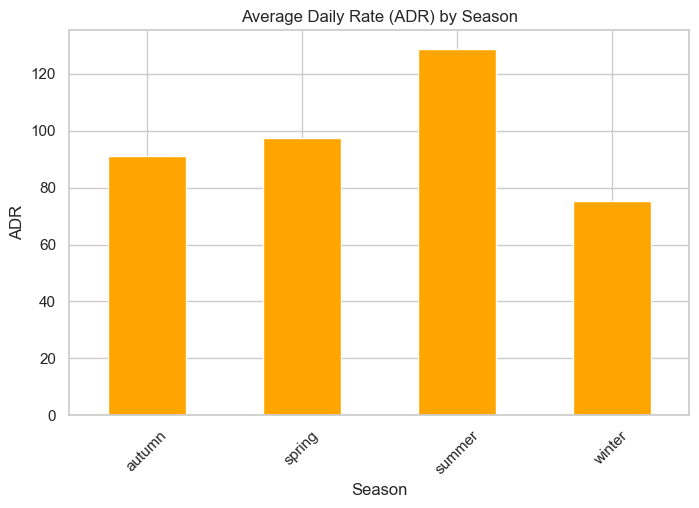

In [22]:
seasonal_adr = df.groupby('season')['adr'].mean()
seasonal_adr.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Average Daily Rate (ADR) by Season')
plt.ylabel('ADR')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.show()

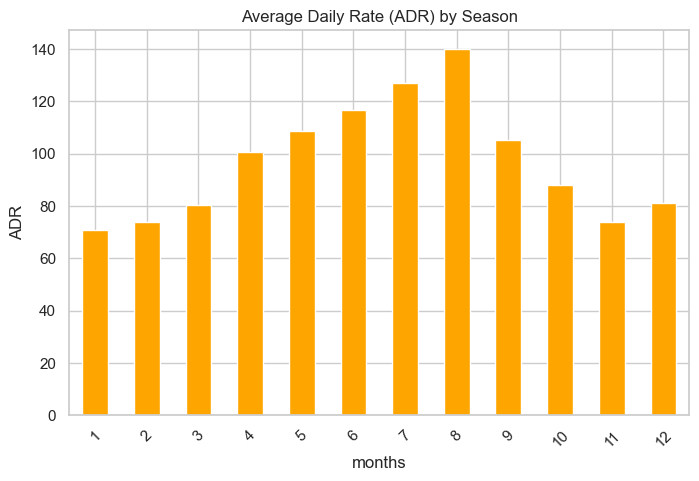

In [23]:
seasonal_adr = df.groupby('arrival_date_month')['adr'].mean()
seasonal_adr.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Average Daily Rate (ADR) by Season')
plt.ylabel('ADR')
plt.xlabel('months')
plt.xticks(rotation=45)
plt.show()

In [24]:
type_and_date = df[['hotel','customer_type','season','arrival_date_month','is_canceled']].copy()
count_canceled_adr = type_and_date.groupby(['hotel','arrival_date_month','customer_type','season']).count().rename(columns={'is_canceled': 'count'})
count_canceled_adr.reset_index(inplace=True)
count_canceled_adr.sort_values(by='arrival_date_month', ascending=True, inplace=True)
count_canceled_adr

,hotel,arrival_date_month,customer_type,season,count
0,City Hotel,1,Contract,winter,20
1,City Hotel,1,Group,winter,14
2,City Hotel,1,Transient,winter,3029
3,City Hotel,1,Transient-Party,winter,673
48,Resort Hotel,1,Contract,winter,6
...,...,...,...,...,...
47,City Hotel,12,Transient-Party,winter,558
92,Resort Hotel,12,Contract,winter,8
93,Resort Hotel,12,Group,winter,24
94,Resort Hotel,12,Transient,winter,1908


 What customer segments (e.g., families, solo travelers) drive the most revenue?

Understanding which customer segments contribute the most to revenue helps hotels tailor their marketing and services. Families, solo travelers, couples, and groups each have unique preferences and spending patterns. By analyzing factors such as group size, meal plans, and special requests, we can identify key drivers of revenue and prioritize high-value customer segments.

In [25]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_revenue'] = df['adr'] * df['total_nights']
df

C:\Users\lapto\AppData\Local\Temp\ipykernel_36432\4150518959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
C:\Users\lapto\AppData\Local\Temp\ipykernel_36432\4150518959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_revenue'] = df['adr'] * df['total_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,season,total_nights,total_revenue
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer,0,0.00
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer,0,0.00
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer,1,75.00
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer,1,75.00
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,summer,2,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,summer,7,672.98
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,summer,7,1578.01
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,summer,7,1103.97
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,summer,7,730.80


(0.0, 10.0)

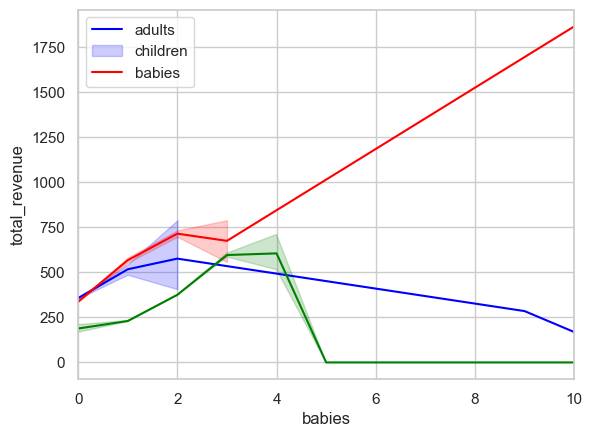

In [26]:
sns.lineplot(data=df,x='babies',y='total_revenue',color='blue')
sns.lineplot(data=df,x='children',y='total_revenue',color='red')
sns.lineplot(data=df,x='adults',y='total_revenue',color='green')
plt.legend(labels=['adults','children','babies'])
plt.xlim(0,10)

C:\Users\lapto\AppData\Local\Temp\ipykernel_36432\1188884813.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='customer_type',y='total_revenue',palette=['red','blue','purple','green'])


<Axes: xlabel='customer_type', ylabel='total_revenue'>

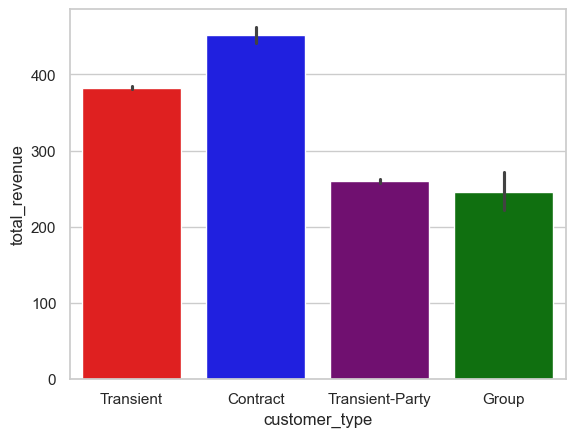

In [27]:
sns.barplot(data=df,x='customer_type',y='total_revenue',palette=['red','blue','purple','green'])

 What factors influence booking lead times?

Booking lead time—the interval between the reservation and the check-in date—varies based on customer type, season, and booking channel. Long lead times may be associated with higher ADRs, as guests secure bookings for peak seasons early, while shorter lead times may be more common for last-minute or business travelers. This analysis uncovers patterns in lead times and identifies factors that influence customer planning behavior.

C:\Users\lapto\AppData\Local\Temp\ipykernel_36432\32202647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='customer_type',y='lead_time',palette=['red','blue','purple','green'],ax=axes1[0])
C:\Users\lapto\AppData\Local\Temp\ipykernel_36432\32202647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='deposit_type',y='lead_time',palette=['red','blue','purple'],ax=axes1[1])
C:\Users\lapto\AppData\Local\Temp\ipykernel_36432\32202647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='is_repeated_guest',y='lead

<Axes: xlabel='customer_type', ylabel='lead_time'>

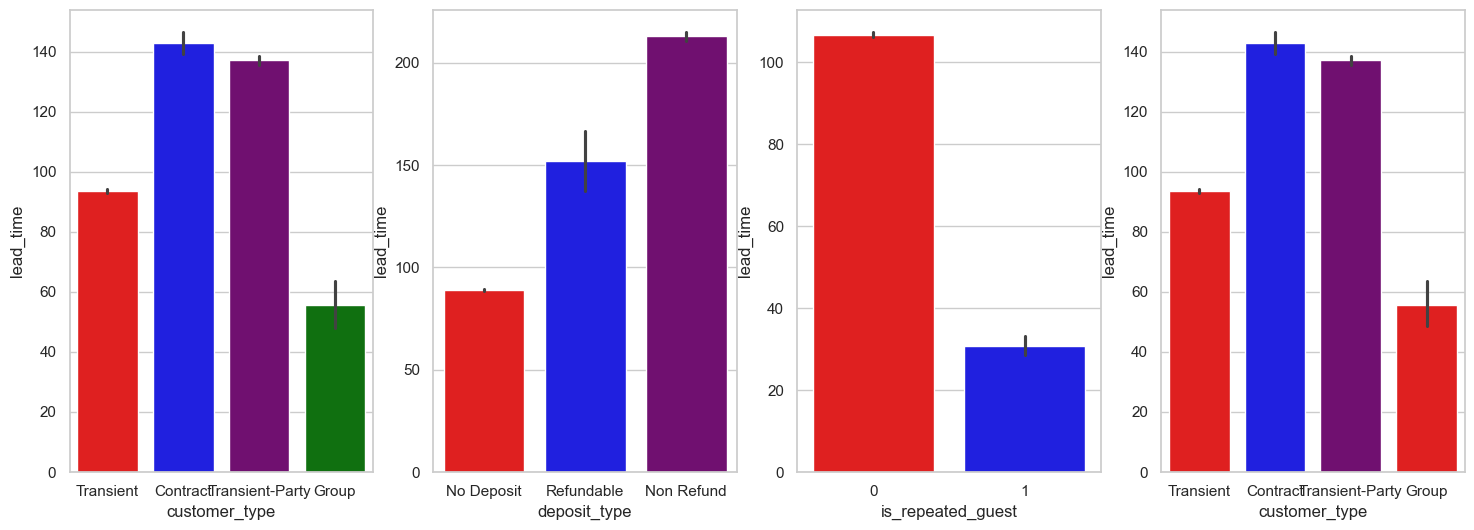

In [28]:
fig1, axes1 = plt.subplots(1, 4, figsize=(18, 6))  
sns.barplot(data=df,x='customer_type',y='lead_time',palette=['red','blue','purple','green'],ax=axes1[0])
sns.barplot(data=df,x='deposit_type',y='lead_time',palette=['red','blue','purple'],ax=axes1[1])
sns.barplot(data=df,x='is_repeated_guest',y='lead_time',palette=['red','blue','purple'],ax=axes1[2])
sns.barplot(data=df,x='customer_type',y='lead_time',palette=['red','blue','purple'],ax=axes1[3])

<Axes: xlabel='previous_cancellations', ylabel='lead_time'>

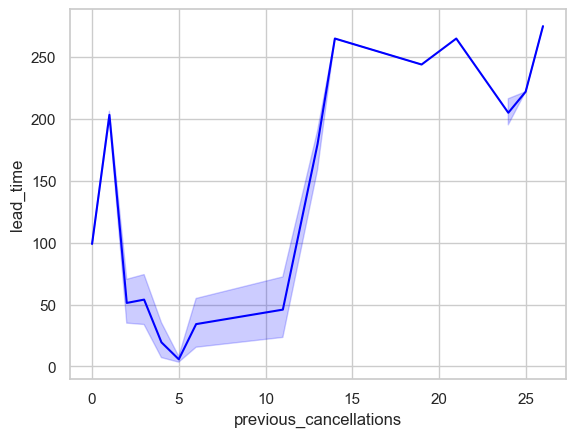

In [29]:
df['previous_cancellations'].value_counts()
sns.lineplot(data=df,x='previous_cancellations',y='lead_time',color='blue')

it doesn't appear that there is a strong correlation between previous_cancelations and lead_time

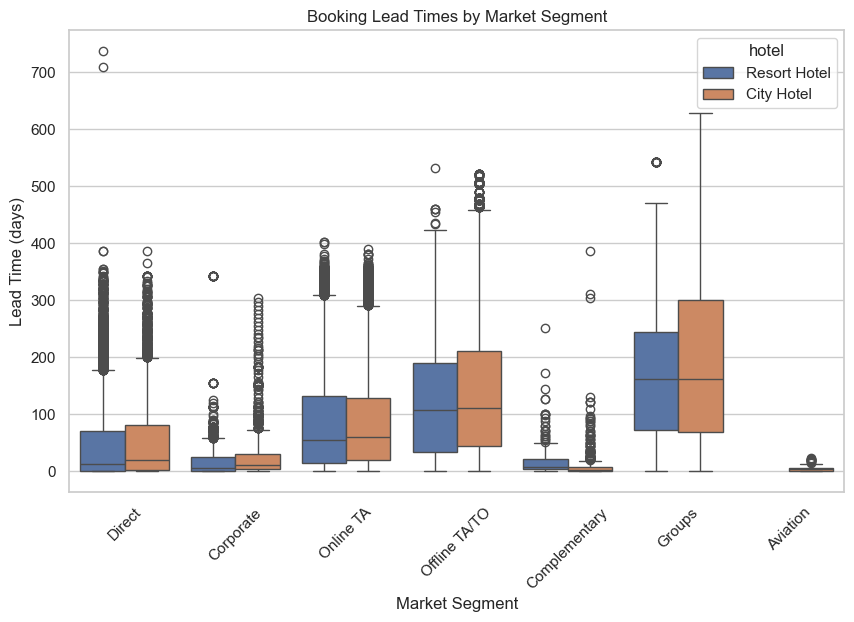

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='market_segment', y='lead_time',hue='hotel')
plt.title('Booking Lead Times by Market Segment')
plt.ylabel('Lead Time (days)')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()

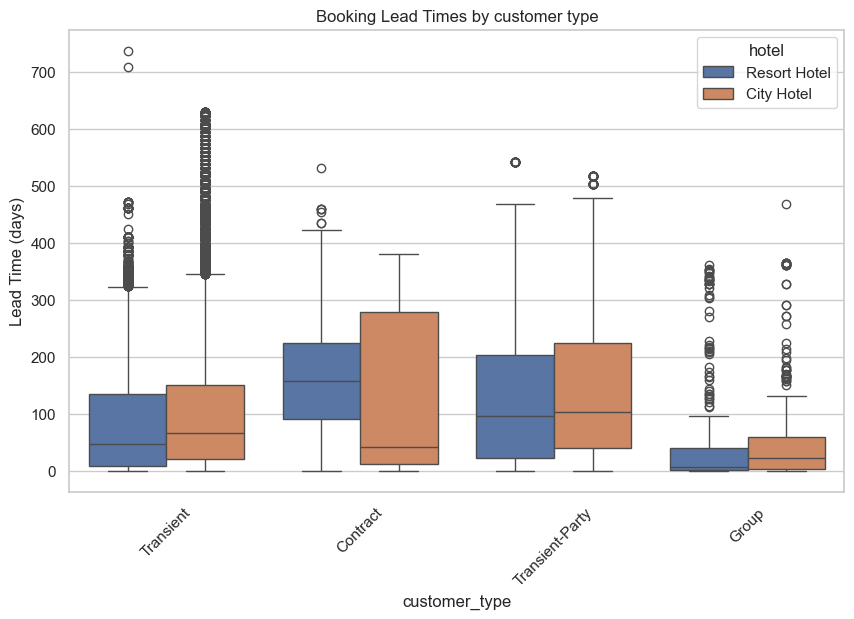

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_type', y='lead_time',hue='hotel')
plt.title('Booking Lead Times by customer type')
plt.ylabel('Lead Time (days)')
plt.xlabel('customer_type')
plt.xticks(rotation=45)
plt.show()

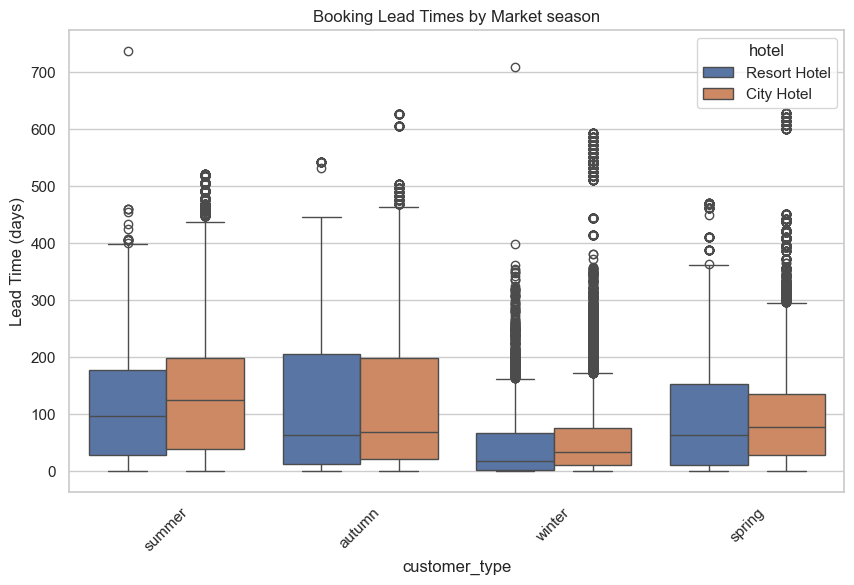

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='lead_time',hue='hotel')
plt.title('Booking Lead Times by Market season')
plt.ylabel('Lead Time (days)')
plt.xlabel('customer_type')
plt.xticks(rotation=45)
plt.show()

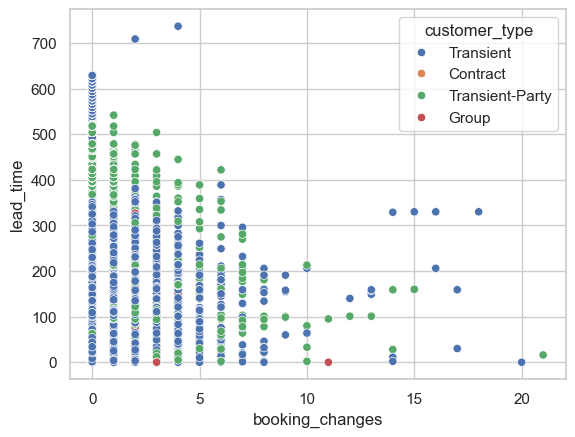

In [33]:
sns.scatterplot(data=df, x="booking_changes", y="lead_time", hue="customer_type")
plt.show()

In [34]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,season,total_nights,total_revenue
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer,0,0.00
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,summer,0,0.00
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer,1,75.00
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,summer,1,75.00
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,summer,2,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,summer,7,672.98
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,summer,7,1578.01
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,summer,7,1103.97
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,summer,7,730.80


## Analyze trends, distributions, and relationships.
## Answering key questions based on the dataset .

 What are the busiest booking periods, and how do they differ by hotel type?

Identifying the busiest booking periods enables better operational planning, from staffing to inventory management. Different hotel types—such as city hotels and resort hotels—may experience peak periods at different times of the year. This section highlights the timing and patterns of peak demand, helping hotels better align their resources with customer needs.

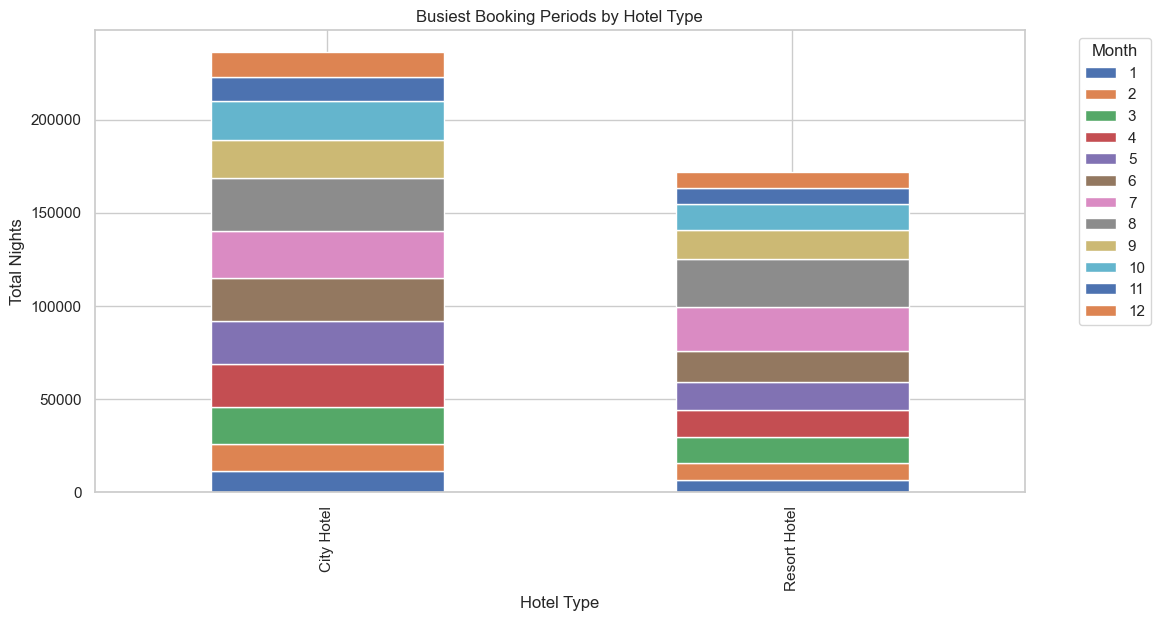

In [35]:
busiest_periods = df.groupby(['hotel', 'arrival_date_month'])['total_nights'].sum().unstack()
busiest_periods.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Busiest Booking Periods by Hotel Type')
plt.ylabel('Total Nights')
plt.xlabel('Hotel Type')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
temp = df[df['arrival_date_week_number']==1][['arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month']]
temp

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
3738,2016,1,1,1
3739,2016,1,1,1
3740,2016,1,1,1
3741,2016,1,1,1
3742,2016,1,1,1
...,...,...,...,...
104460,2017,1,1,7
104516,2017,1,1,1
104569,2017,1,1,3
104570,2017,1,1,3


In [37]:
pd.Series(df['lead_time']).sort_values()

43108       0
91684       0
118559      0
29891       0
29885       0
         ... 
65244     629
65245     629
65243     629
4182      709
1         737
Name: lead_time, Length: 118897, dtype: int64

In [38]:
df['arrival_date'].dt.day_of_year

0         182
1         182
2         182
3         182
4         182
         ... 
119385    242
119386    243
119387    243
119388    243
119389    241
Name: arrival_date, Length: 118897, dtype: int32

In [39]:
temp = pd.DataFrame(df[df['hotel']=='City Hotel']['arrival_date'].dt.day_of_year.value_counts())
temp2 = pd.DataFrame(df[df['hotel']=='Resort Hotel']['arrival_date'].dt.day_of_year.value_counts())

temp.loc[:,'hotel'] = 'City Hotel'
temp2.loc[:,'hotel'] = 'Resort Hotel'


temp2.merge(temp)
temp

,count,hotel
arrival_date,,
226,524,City Hotel
289,434,City Hotel
261,405,City Hotel
203,404,City Hotel
126,402,City Hotel
...,...,...
347,53,City Hotel
349,52,City Hotel
11,46,City Hotel


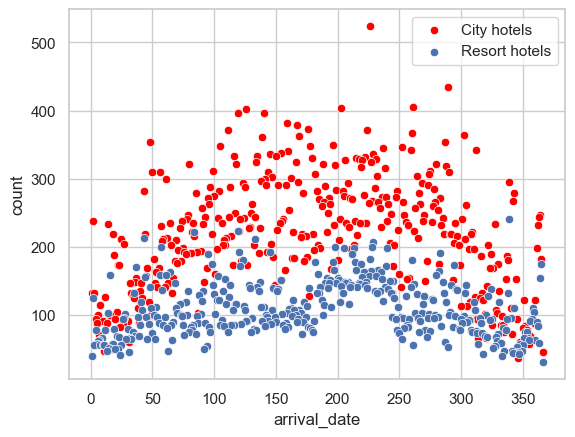

In [40]:
df[df['hotel']=='Resort Hotel']['arrival_date'].dt.day_of_year
ax = sns.scatterplot(df[df['hotel']=='City Hotel']['arrival_date'].dt.day_of_year.value_counts(),color='red',legend='auto',label='City hotels')
ax = sns.scatterplot(df[df['hotel']=='Resort Hotel']['arrival_date'].dt.day_of_year.value_counts(),label='Resort hotels')

In [41]:
temp = pd.DataFrame(df[df['hotel']=='Resort Hotel'][['arrival_date',"hotel"]])
temp['Counts'] = temp.groupby(['arrival_date'])['hotel'].transform('count')   
# temp.name = pd.DataFrame({'arrival_date':temp['arrival_date'],'name':temp['arrival_date'].dt.day_name()})
temp.drop_duplicates(subset=['arrival_date'],inplace=True)
print(temp.sort_values(by=['Counts'],ascending=False))
print(temp.Counts.mean())

      arrival_date         hotel  Counts
3303    2015-12-05  Resort Hotel     222
3987    2016-02-12  Resort Hotel     175
4529    2016-03-24  Resort Hotel     170
4183    2016-02-26  Resort Hotel     153
1833    2015-09-17  Resort Hotel     152
...            ...           ...     ...
3079    2015-11-14  Resort Hotel      11
3459    2015-12-13  Resort Hotel      10
2455    2015-10-17  Resort Hotel       9
20336   2016-01-24  Resort Hotel       7
3266    2015-11-29  Resort Hotel       5

[793 rows x 3 columns]
49.931904161412355


In [42]:
temp = pd.DataFrame(df[df['hotel']=='City Hotel'][['arrival_date',"hotel"]])
temp['Counts'] = temp.groupby(['arrival_date'])['hotel'].transform('count')   
# temp.name = pd.DataFrame({'arrival_date':temp['arrival_date'],'name':temp['arrival_date'].dt.day_name()})
temp.drop_duplicates(subset=['arrival_date'],inplace=True)
print(temp.sort_values(by=['Counts'],ascending=False))
print(temp.Counts.mean())

      arrival_date       hotel  Counts
44913   2015-10-16  City Hotel     340
58471   2016-10-13  City Hotel     322
60156   2016-11-07  City Hotel     320
43305   2015-09-18  City Hotel     311
68490   2017-05-19  City Hotel     291
...            ...         ...     ...
40286   2015-07-19  City Hotel       7
40191   2015-07-14  City Hotel       6
40472   2015-07-26  City Hotel       6
40594   2015-08-02  City Hotel       6
81291   2015-12-07  City Hotel       6

[793 rows x 3 columns]
100.00126103404791


## bussiest booking periods:
as already shown we notice two things 
there are certain days that people prefer booking at.
booking periods' busyness vary depending on the type of hotel as we notice the top 5 bussiest days 
# for resort hotels:
2015-12-05	Resort Hotel  222
2016-02-12	Resort Hotel  175
2016-03-24	Resort Hotel  170
2016-02-26	Resort Hotel  153
2015-09-17	Resort Hotel  152

# for city hotels:
2015-10-16	City Hotel	340
2016-10-13	City Hotel	322
2016-11-07	City Hotel	320
2015-09-18	City Hotel	311
2017-05-19	City Hotel	291

this might indicate that these days are some sort of holidays or vacation days.

and we notice that city hotels are more busy than resort hotels, 
as on average we notice city hotels are booked close to 100.0 times every day of the year
on the other hand resort hotels are booked on average a mean of close to 49.9 times daily during the same research period
with the city hotels booking taking the top 5 numbr of bookings on a singke day

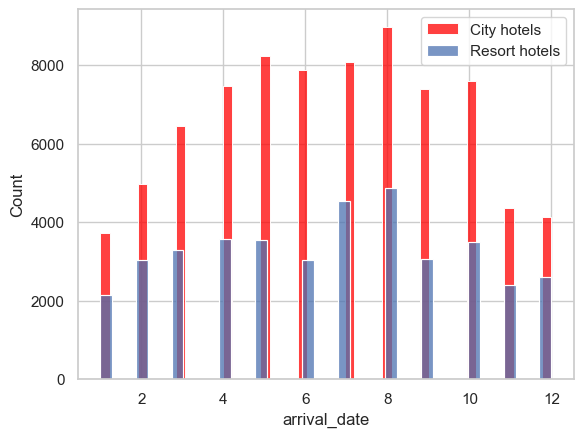

In [43]:
ax = sns.histplot(df[df['hotel']=='City Hotel']['arrival_date'].dt.month,color='red',legend='auto',label = 'City hotels')
ax = sns.histplot(df[df['hotel']=='Resort Hotel']['arrival_date'].dt.month,label='Resort hotels')
ax.legend()

# seasons and booking rates

we notice a trend that bookings occur more often during summer seasons for city hotels and decreases during the winter season, that could be proof to people prefering to book during holiday/ vacation seasons on average for cities
for resort hotels we notice some similarities as both the months july and august are booked more compared to the rest of the month with the same decrease in frequency if booking during winter months, we also notice a decline on booking during the month juin, this might be due to some other factor we are yer to discover



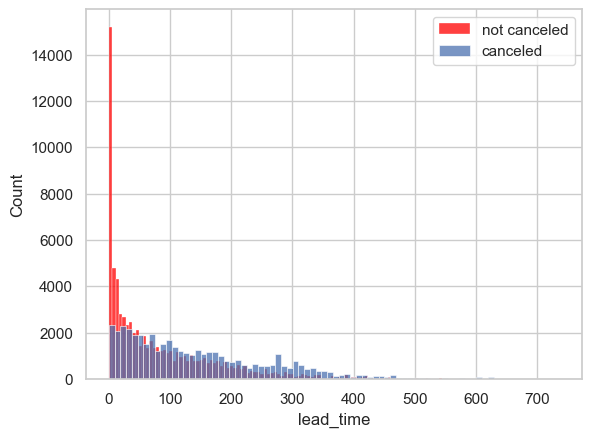

In [44]:
ax = sns.histplot(df[df['is_canceled']==0]['lead_time'],color='red',legend='auto',label = 'not canceled')
ax = sns.histplot(df[df['is_canceled']==1]['lead_time'],label='canceled')
ax.legend()

In [45]:
temp = pd.DataFrame(df[df['is_canceled']==0][['lead_time',"is_canceled"]])
temp['Counts'] = temp.groupby(['lead_time'])['is_canceled'].transform('count')   
# temp.name = pd.DataFrame({'arrival_date':temp['arrival_date'],'name':temp['arrival_date'].dt.day_name()})
temp.drop_duplicates(subset=['lead_time'],inplace=True)
print(temp.sort_values(by=['Counts'],ascending=True))
print(temp.Counts.mean())
#mean lead time for canceled

       lead_time  is_canceled  Counts
1            737            0       1
17427        532            0       1
8191         370            0       1
14188        454            0       1
8224         375            0       1
...          ...          ...     ...
100            4            0    1523
53             3            0    1621
72             2            0    1823
54             1            0    3076
6              0            0    5807

[422 rows x 3 columns]
177.1208530805687


In [46]:
temp = pd.DataFrame(df[df['is_canceled']==1][['lead_time',"is_canceled"]])
temp['Counts'] = temp.groupby(['lead_time'])['is_canceled'].transform('count')   
# temp.name = pd.DataFrame({'arrival_date':temp['arrival_date'],'name':temp['arrival_date'].dt.day_name()})
temp.drop_duplicates(subset=['lead_time'],inplace=True)
print(temp.sort_values(by=['Counts'],ascending=True))
print(temp.Counts.mean())
#mean lead time for not canceled

       lead_time  is_canceled  Counts
68145        366            1       1
71499        387            1       1
14680        399            1       1
57320        429            1       1
8313         397            1       1
...          ...          ...     ...
511           37            1     319
148           34            1     330
584           28            1     339
826           56            1     354
438            0            1     416

[465 rows x 3 columns]
94.9505376344086


we notice from the graph at first glance there is a big number of non canceled bookings that spike around the value close to 0 lead time

we notice from the graph that lead time is a bit high for the average of the canceled bookings 
and that can be confirmed from the average lead time of canceled bookings being around 177.1 which is almost double the average lead time for non canceled bookings which stands around 95.0 

this might suggest that people who book earlier tend to have a higher chance of cancelation, this might be due to the higher period that can result in a change of plans, this also supports the hypothesis that the reason why most 0 lead time bookings occur more for non canceled bookings

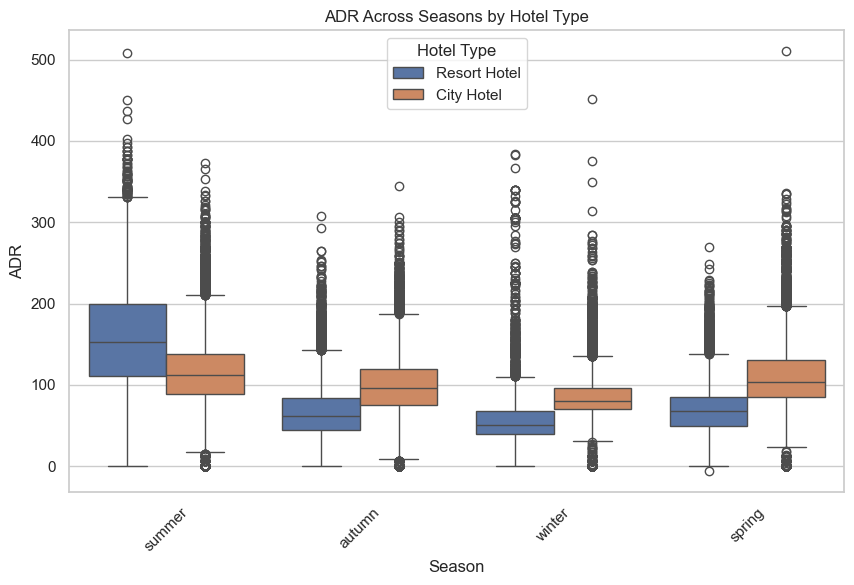

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='adr', hue='hotel')
plt.title('ADR Across Seasons by Hotel Type')
plt.ylabel('ADR')
plt.xlabel('Season')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45)
plt.show()

In [48]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_nights,total_revenue
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,...,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,6.552916,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,...,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-08-29 02:41:58.610225920,3.431062,358.417811
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2015-07-01 00:00:00,0.000000,-63.800000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-03-14 00:00:00,2.000000,148.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-09-07 00:00:00,3.000000,267.300000
75%,1.000000,161.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-03-19 00:00:00,4.000000,447.120000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,...,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-08-31 00:00:00,57.000000,6300.000000
std,0.483167,106.903570,0.707462,3.087046,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,...,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN,2.544939,334.376728


In [49]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,hotel[object],1. City Hotel2. Resort Hotel,"79,301 (66.7%)39,596 (33.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC8ii80itBshNEVs3EyKFCE4pXhjnu9ZwTe+CGz0UmstAIUUEeeIOPU+BP+6t9auvY84yjBN00fOeex9CB7VWreU0qdLcEPOebxcLtdSyq33Mfi17/v7sizjuq6niPCILSKilHKb5/mr9zF4cO59wJHeeh+A10FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoPMEPHzol7vQ/CX43cy1Fq3ZVnGMHtRz0GtdYuIe+87jsLg5blZDV4SUz6oOD7ZrJ4GTuymfG7zNydWUz7H+ZsTxykfv6qfFH/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZqymfy+dwZTflc5u/OWHwAplvCltq31B2yb4AAAAASUVORK5CYII="">",0(0.0%)
2,is_canceled[int64],1. 02. 1,"74,745 (62.9%)44,152 (37.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBCF4VExodlIGIMP40P0sD2EbmOMtWhCNuqiZ8gb1fN/J5iEH0OCX+q9G6CQzOxuZjfvQ4J79d4f3ke827Qsy1fOefY+JLLW2pFS+r56cFPOed627VFKeXofE9F5np+11nnf95uZXTs2M7NSynNd1x/vYwK7ex+g8OF9AOIgNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBZjL7e4HP+5CoIn33U2vtqLXOFuQFvhG11g4ze3nf8W4MXsYQYvCSmPJBJdKTLcTTY2RhpnxR5nIjCzHlizSXG1mkKR+/tp3xpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskAkx5bv65/svwkz5oszlRsbgBTK/Cltq36Cso0UAAAAASUVORK5CYII="">",0(0.0%)
3,lead_time[int64],Mean (sd) : 104.3 (106.9)min < med < max:0.0 < 69.0 < 737.0IQR (CV) : 143.0 (1.0),479 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACFklEQVR4nO3cP2/aQByH8d+VBB0Q2SAi2LyydWBk6Tvoi+3anZ23gQSxEW4IyLouiVRVLakvRXyxn8+K7uThEfdnOBdCMEDFp2t/APCru3M/Oud6ZtaNnPsYQniOHIuW+muQzrneeDz+miTJKGbi3W735Jz7RpSo49w/ZDdJktFisXhO0/RQZ9KiKPxyuRxtNpuumREk/tnZJdvMLE3Tw2Qy+RExdy9iDFqOQw2kECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkvPuCbqyqqu7NLHHOxQznwfyWukiQZVnen06nz1mWdTqdTq33yc14ML/NLhLk8Xi889735/P5YTqdPtUZy4P57XaxJdvMbDAY8GA+auFQAykECSkECSkECSkXPdTE4g6zveSC5A6z3eSC5A6z3eSCfMMdZjtxqIEUgoQUgoQU2T1kLK6MblujguTK6PY1KkiujG5fo4J8w5XR7WpkkLHYf14fQb5i/6mBIF+x/9RAkL+J3X9WVZUYy/2HEeR/8NHlPs/zvXPuu5nVHmsNi/ndIIui8HUn3e/33sysLEu/Xq/7TR+73W4fvPf92WzmhsPhS52xeZ4/rFarL1mWPV4h5mt5CSH88Xt/Al6XGT4RewHjAAAAAElFTkSuQmCC"">",0(0.0%)
4,arrival_date_year[int64],1. 20162. 20173. 2015,"56,434 (47.5%)40,604 (34.2%)21,859 (18.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrbYBSF0aciQjORMAYvxovoYrsI7cYYa9CETNRB56VNy/1/S+es4Nl82Mj4Dtu2FSR8aX0AxzFU1WtVvbQ+5Al8bNv21vqIZzaez+dv0zSdWh/Su3Vd78MwfBfc543TNJ2u1+vbPM/vrY/p1ePx+Losy+l2u71Uldg+aayqmuf5/XK5/Gh9TOdeWx/w7DwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmrPr1f63Wh/TM+/N/jOu63pdlOZX/a/3Wuq73qvpofcczs0H4czYI/2gw5SNlr59sPoU6tMt1lSVUn3a3rrKE6tde11WerDvkR11ixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxOxuXbWn17I3u1xXWUL1yQaBGOsqYjwgENPia9RX3EHFp3xmdscVnfKZ2R1biynfbn5i4e94QCBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGTHTKZ2Z3bPEpn5ndcdkgEGPKR8xPSryjSgVbMFEAAAAASUVORK5CYII="">",0(0.0%)
5,arrival_date_month[int32],Mean (sd) : 6.6 (3.1)min < med < max:1.0 < 7.0 < 12.0IQR (CV) : 5.0 (2.1),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACS0lEQVR4nO3dz4raUBiG8e80o0SFBBF05w0UunDpRfRiewldeAXegTtBQsR0gjGmqzJTaBWjMW+Oz2875A+Hh3MyHwzjqqoyQMWXtl8A+Ozt0g+dcwMz69e897Gqqvea174U1vnDf4N0zg0mk8n3KIrGdW683+8T59wPnxarCazz3y7tkP0oisbL

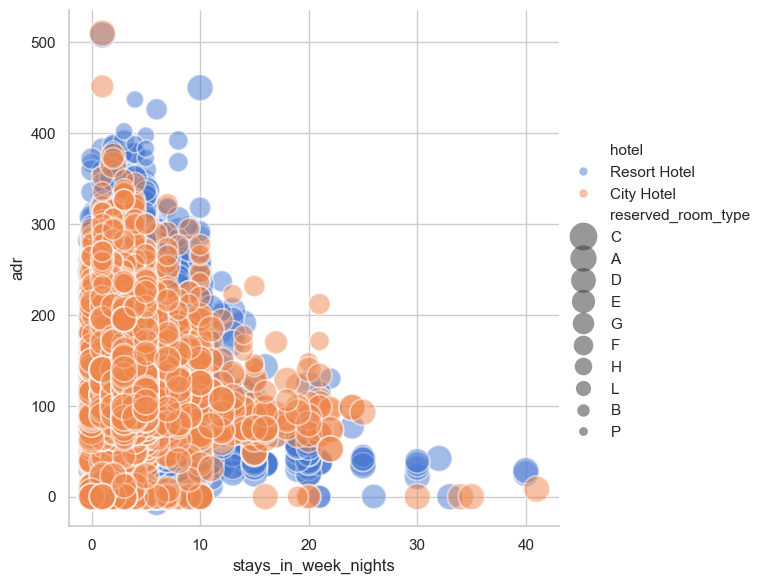

In [50]:

sns.relplot(x="stays_in_week_nights", y="adr", hue="hotel", size="reserved_room_type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

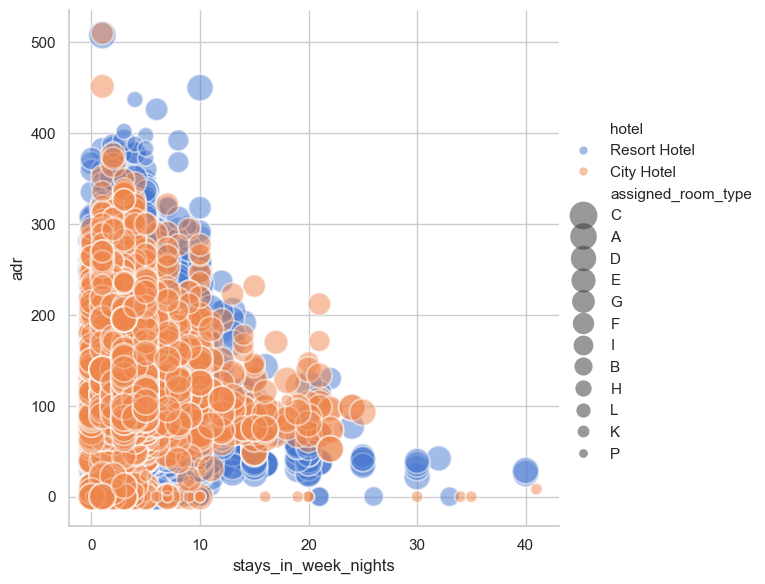

In [51]:
sns.relplot(x="stays_in_week_nights", y="adr", hue="hotel", size="assigned_room_type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

This analysis provides actionable insights into hotel booking behavior, enabling data-driven decision-making for revenue optimization, operational planning, and customer experience enhancement. By understanding the interplay between customer segments, seasonality, and booking patterns, hotels can create targeted strategies to boost performance and meet customer expectations.

In [52]:
# import sweetviz as sv


# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


In [56]:
import pycountry
from countryinfo import CountryInfo


# Apply function to each row
counts = df["country"].value_counts().reset_index()

# Rename columns properly
counts.columns = ["Country_Code", "Count"]

# Save it as a new DataFrame
df_countries = counts
def get_lat_lon(alpha3):
    try:
        # Convert alpha-3 code (e.g. 'FRA') to country name
        country = pycountry.countries.get(alpha_3=alpha3)
        if country:
            info = CountryInfo(country.name).info()
            latlng = info.get("latlng", [None, None])
            if latlng and len(latlng) == 2:
                return latlng
    except:
        return [None, None]
    return [None, None]

# Apply function
df_countries[["Latitude", "Longitude"]] = df_countries["Country_Code"].apply(
    lambda code: pd.Series(get_lat_lon(code))
)
df_countries["Country_Code"].value_counts()

Country_Code
PRT    1
GBR    1
FRA    1
ESP    1
DEU    1
      ..
MRT    1
KIR    1
SDN    1
ATF    1
SLE    1
Name: count, Length: 177, dtype: int64

In [59]:
dfSummary(df_countries)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Country_Code[object],1. PRT2. GBR3. FRA4. ESP5. DEU6. ITA7. IRL8. BEL9. BRA10. NLD11. other,1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)167 (94.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cMW4aUQBF0Y+FrLgZhJBYDIvwYrMIdoMQU8SWG1KElA6Wk1wUck6VIsUUV8Pk678szufzgMLDrR+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKM8TTGGOfz+eXGz8KdW242m+cxxlgsFl8Fx9/0ME3Tepqm9Rjj8dYPw33zzUZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZJbzPB8vf3676ZNw92wQyCz8l1lUvNnIWFeRsa4i4+iDjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZ18LJGLyQ8WYjY/BCxuCFjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxjcbGT+jZKyryFhXkfHNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGvhZKyryHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjA0CGesqMt5sZKyryFhXkXH0QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGvhZAxeyHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IeObjYyfUTLWVWSsq8j4ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca1cDLWVWS82cgYvJAxeCHj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJD5+WZzJZzf9Xbt13G52WyeLxsE+LR5no/XRlPLaZrWu93uZbVavZYPx/04nU5f9vv9+nA4PI4x3o9tjDFWq9Xrdrv9lj0d9+jp2l9wzkZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmOcaPKyK3fhD+XR/tZznP83G/36/HB66IwHsuw6lfjqZcC+dPuXot3OCFjH8gkBEbGbGRERsZsZERGxmxkREbGbGR+Q6r/BAn38TSMAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Count[int64],Mean (sd) : 671.7 (3930.8)min < med < max:1.0 < 12.0 < 48585.0IQR (CV) : 72.0 (0.2),85 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmklEQVR4nO3XsUrDUBSH8XOStrRQbyiFjFncfYA+hA/r6p63cO9SbIoxtSFeVwet5oL2D/1+azjnBvKREI8xGqAiu/QNAJ9Nzl1094WZzRJ3n2KMXeIsrtS3Qbr7Yr1e34cQVimLD4fDs7s/ECXGOPeGnIUQVpvNpiuK4jhmadM087quV7vdbmZmBIlfO/vJNjMriuJYluVrwu5FwgyuHD81kEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkDL5q8XDMEzNLLh7ynhmZu+JR59ijF3iLC7sxyCbppmPXbrdbm/6vr+rqirP8/w4ZnYYhmnbtrfL5fIpy7J+7Nn7/f7F3R/NbNS5+FdvMcYvn88HqKdFuEk9gd0AAAAASUVORK5CYII="">",0(0.0%)
3,Latitude[float64],Mean (sd) : 20.7 (25.0)min < med < max:-41.0 < 20.0 < 65.0IQR (CV) : 37.0 (0.8),120 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcElEQVR4nO3czWrqQBiA4W+OVeMPCSLozhs4cBYucxG92HMJXXgF3oE7QSRi2mCM6aalPQeqmN9vxvfZTxnoi8kkkzF5ngugxa+2JwB899T2BFxhjBmISK/g8FOe529VzsdWBFkBY8xgOp0++74/KTL+cDjsjTF/iZIgq9LzfX8ShuFbEATJPQOjKPJWq9Vkt9v1RIQg256AS4IgSGaz2WuBoYPKJ2MpFjVQhSChCkFCFYKEKgQJVQgSqhAkVOE55APT+LqTIB+U1tedBPm4VL7uJMgHp+11J0FarsR9oH+5XLpVz6csgrRYmfvANE29LMt+J0nyIiJFfiFrQZB2K3wfuNlsJuv1eng+nzt1Ta4IgnRAkfvA/X6vcssbD8ahCkFCFS7Z37i2YrURQX5wccVqI4L84tyK1UYE+R+XVqw2YlEDVQgSqnDJViDLsq6I+MaYe4c6t7onyJbFcdxN0/TPYrHodDqduxZTLq7uCbJlp9PpyfO84XK5TObz+f6esS6u7glSidFoxOpeWNRAGYKEKgQJVQgSqhAkVCFIqEKQUEXlc0iNR3ygGeqC1HrEB5pRW5BlPgcYj8ezMAwPmo74wL9KbAgRuXIVqyXIKj4H6Pf7L5qO+MCXMhtCRK5fxer6hWztcwC2ctWvzIaQW1exWu8hm/4cgK1czSqyIeTDj/9jdYuaMtjKZT+ngvzEVi578WAcqhAkVCFIqEKQUIUgoQpBQhWChCoECVUIEqpcfVPDibJo2o9BcqIs2nDtF5ITZdG4m5srOFEWTWJRA1UIEqrcvGRHUeTd+0ePx6MnIhLHsbfdboeMZeynWz29A8xuoQcQO5KSAAAAAElFTkSuQmCC"">",24(13.6%)
4,Longitude[float64],Mean (sd) : 14.7 (62.4)min < med < max:-170.0 < 17.0 < 175.0IQR (CV) : 52.2 (0.2),123 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYN

In [61]:
skim(df_countries)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 177    │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Count           │    0 │       0 │   671.7 │    3931 │      1 │     2 │    12 │      74 │  48580 │    ▇    │  │
│ │ Latitude        │   24 │   13.56 │   20.71 │   25.02 │    -41 │     5 │    20 │      42 │     65 │ ▁▃▆▇▇▅  │  │
│ │ Longitude       │   24 │   13.56 │   14.68 │    62.4 │   -170 │    -8 │    17 │   44.25 │    175 │  ▃▂▇▂▁  │  │
│ └─────────────────┴──────┴─────────┴─────────┴─────────┴────────┴───────┴───────┴─────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Country_Code               │      0 │          0 │                            1 │                      177 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [69]:
missing_coords = df_countries[df_countries["Latitude"].isna() | df_countries["Longitude"].isna()]

missing_coords

,Country_Code,Count,Latitude,Longitude
12,CN,1279,NaN,NaN
27,TUR,248,NaN,NaN
31,CZE,171,NaN,NaN
33,KOR,133,NaN,NaN
39,IRN,83,NaN,NaN
55,TWN,51,NaN,NaN
70,VEN,26,NaN,NaN
72,CPV,24,NaN,NaN
81,MAC,16,NaN,NaN
93,BOL,10,NaN,NaN


In [70]:
# Manual mapping for missing countries (lat/lon roughly at country centroid)
fallback_coords = {
    "CN": [35.0, 105.0],
    "TUR": [39.0, 35.0],
    "CZE": [49.8, 15.5],
    "KOR": [37.5, 127.5],
    "IRN": [32.0, 53.0],
    "TWN": [23.7, 121.0],
    "VEN": [7.0, -66.0],
    "CPV": [15.1, -23.6],
    "MAC": [22.2, 113.6],
    "BOL": [-17.0, -65.0],
    "MKD": [41.6, 21.7],
    "VNM": [16.0, 108.0],
    "AND": [42.5, 1.5],
    "CIV": [7.5, -5.5],
    "TZA": [-6.0, 35.0],
    "MNE": [42.5, 19.3],
    "TMP": [-8.8, 126.0],  # Timor-Leste
    "ATA": [-82.8, 135.0], # Antarctica
    "STP": [1.0, 7.0],
    "VGB": [18.5, -64.5],
    "BHS": [25.0, -76.0],
    "UMI": [19.3, 166.6],
    "MMR": [21.9, 95.9],
    "ATF": [-49.3, 69.3]
}

# Fill in missing ones
for code, (lat, lon) in fallback_coords.items():
    df_countries.loc[df_countries["Country_Code"] == code, ["Latitude", "Longitude"]] = [lat, lon]

print(df_countries[df_countries["Country_Code"].isin(fallback_coords.keys())])


    Country_Code  Count  Latitude  Longitude
12            CN   1279      35.0      105.0
27           TUR    248      39.0       35.0
31           CZE    171      49.8       15.5
33           KOR    133      37.5      127.5
39           IRN     83      32.0       53.0
55           TWN     51      23.7      121.0
70           VEN     26       7.0      -66.0
72           CPV     24      15.1      -23.6
81           MAC     16      22.2      113.6
93           BOL     10     -17.0      -65.0
95           MKD     10      41.6       21.7
101          VNM      8      16.0      108.0
104          AND      7      42.5        1.5
107          CIV      6       7.5       -5.5
112          TZA      5      -6.0       35.0
113          MNE      5      42.5       19.3
124          TMP      3      -8.8      126.0
132          ATA      2     -82.8      135.0
142          STP      2       1.0        7.0
153          VGB      1      18.5      -64.5
157          BHS      1      25.0      -76.0
160       

In [71]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Code  177 non-null    object 
 1   Count         177 non-null    int64  
 2   Latitude      177 non-null    float64
 3   Longitude     177 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ KB


In [ ]:
# df_countries.to_csv('countries_loc.csv',index=False)